## Playing with neural nets.
+ Concentric classes, 1 layer, Sigmoid.
+ Concentric classes, 1 layer, ReLu.
+ X-or, 0 layer.
+ X-or, 1 layer.
+ Spiral data.
+ Regression.


http://playground.tensorflow.org

![GitHub Logo](https://srirangatarun.files.wordpress.com/2016/12/screen-shot-2019-06-19-at-12.45.40-pm.png)


In [1]:
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

# Deep Learning in `keras`

> Keras is a high-level neural networks library, written in Python and capable of running on top TensorFlow. It was developed with a focus on enabling fast experimentation.

The core data structure of Keras is a model, a way to organize layers. The main type of model is the ``Sequential model``, a linear stack of layers. 

```Python
from keras.models import Sequential
model = Sequential()
```

Stacking layers is as easy as ``.add()``:

```Python
from keras.layers import Dense, Activation

model.add(Dense(output_dim=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))
```

Once your model looks good, configure its learning process with ``.compile()``:

```Python
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=['accuracy'])
```

If you need to, you can further configure your optimizer.

```Python
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
```

You can now iterate on your training data in batches:

```Python
model.fit(X_train, Y_train, nb_epoch=5, batch_size=32)
```

Evaluate your performance in one line:
```Python
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
```

Or generate predictions on new data:

```Python
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)
```

## FIRST PROBLEM: MedMNIST CLASSIFICATION

From here: https://medmnist.com/

In [3]:
import os
import numpy as np

In [4]:
from medmnist import BloodMNIST
dataset = BloodMNIST(split='train', download=True)

Using downloaded and verified file: /Users/ssegui/.medmnist/bloodmnist.npz


In [5]:
dataset_name = 'bloodmnist'
dataset_path = '/Users/ssegui/.medmnist'

In [6]:
dataset = np.load(os.path.join(dataset_path, dataset_name + '.npz'))

X_train = dataset['train_images']
y_train = dataset['train_labels']
X_val = dataset['val_images']
y_val = dataset['val_labels']
X_test = dataset['test_images']
y_test = dataset['test_labels']

In [7]:
X_train.shape

(11959, 28, 28, 3)

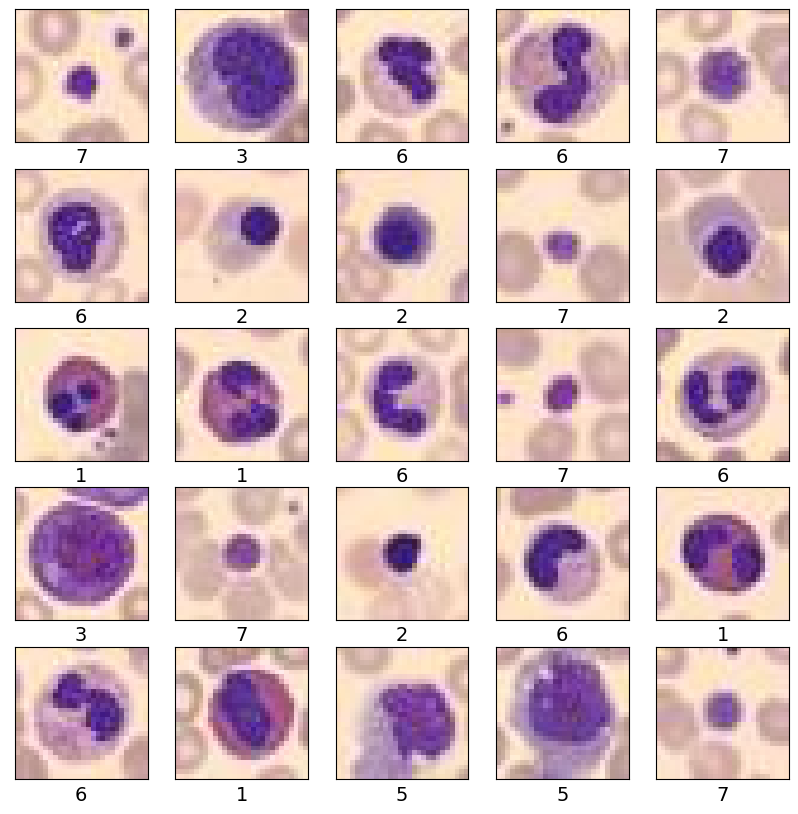

In [8]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7']


num_train, height, width, channels  = X_train.shape # there are 50000 training examples in FASHION-10 
num_test = X_test.shape[0] # there are 10000 test examples in FASHION-10

X_train = X_train.reshape(num_train,height*width*channels)
X_test = X_test.reshape(num_test,height*width*channels)


num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_test) # Normalise data to [0, 1] range



Y_train = keras.utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = keras.utils.to_categorical(y_test, num_classes) # One-hot encode the labels


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((height,width,channels)), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(Y_train[i])])
plt.show()

In [9]:
import matplotlib.pylab as plt

def plot_history(histories):
    for (history,name) in histories:
        plt.plot(history.history['accuracy'],'o-',label  = name+' train')
        plt.plot(history.history['val_accuracy'],'o--',label  = name+' test')

        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(loc='upper left')
    plt.show()

    for (history,name) in histories:
        plt.plot(history.history['loss'],'o-',label  = name+' train')
        plt.plot(history.history['val_loss'],'o--',label  = name+' test')

        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(loc='upper left')
    plt.show()

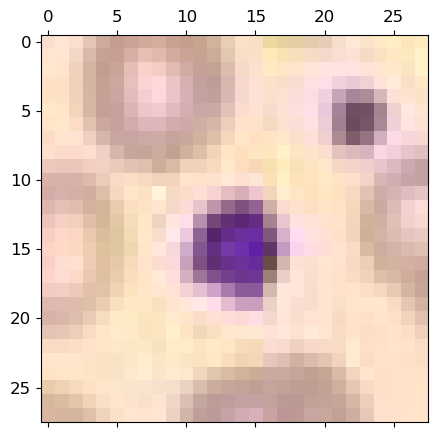

label 0


In [10]:
i = 0
plt.matshow(X_train[i].reshape((height,width,channels)),cmap=plt.cm.binary)
plt.show()
print("label", np.argmax(y_train[i]),)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop


## DEFINE PARAMETERS
batch_size = 128
num_classes = 8
epochs = 10


## CREATE THE MODEL
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(height*width*channels,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

## PRINT SUMMARY
model.summary()

## COMPILE MODEL -> loss + optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## TRAIN THE MODEL
history_baseline = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))


## EVALUATE THE MODEL USING TEST SET
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               602368    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2056      
Total params: 670,216
Trainable params: 670,216
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.
2023-06-14 16:13:47.468892: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 16:13:47.469206: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 11959 samples, validate on 3421 samples
Epoch 1/10
11959/11959 [==============================] - 2s 174us/step - loss: 1.3749 - accuracy: 0.4949 - val_loss: 0.9777 - val_accuracy: 0.6831
Epoch 2/10
11959/11959 [==============================] - 1s 124us/step - loss: 0.9320 - accuracy: 0.6649 - val_loss: 0.8502 - val_accuracy: 0.6957
Epoch 3/10
11959/11959 [==============================] - 1s 122us/step - loss: 0.8362 - accuracy: 0.6976 - val_loss: 0.7472 - val_accuracy: 0.7252
Epoch 4/10
11959/11959 [==============================] - 2s 133us/step - loss: 0.7521 - accuracy: 0.7356 - val_loss: 0.7505 - val_accuracy: 0.7235
Epoch 5/10
11959/11959 [==============================] - 1s 119us/step - loss: 0.7147 - accuracy: 0.7441 - val_loss: 0.7108 - val_accuracy: 0.7305
Epoch 6/10
11959/11959 [==============================] - 1s 114us/step - loss: 0.6655 - accuracy: 0.7633 - val_loss: 0.7300 - val_accuracy: 0.7229
Epoch 7/10
11959/11959 [==============================] - 1s 11

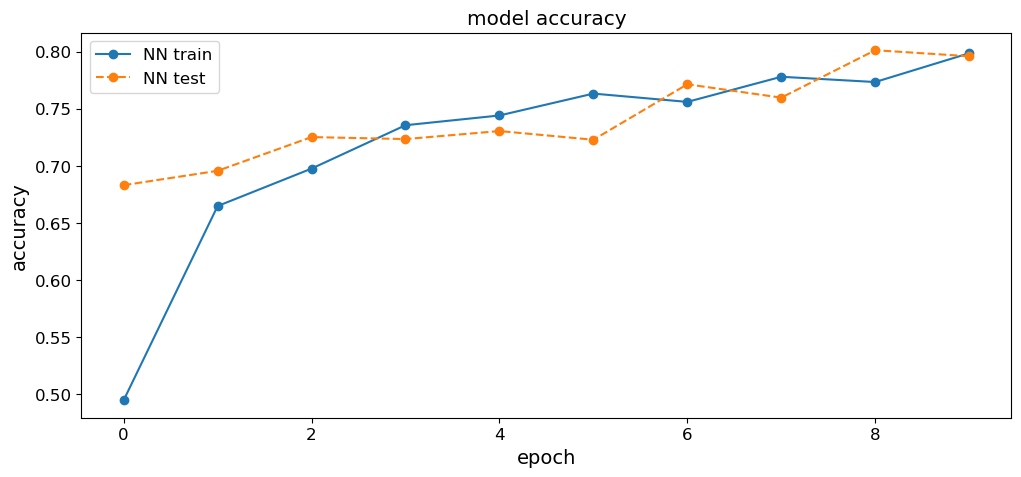

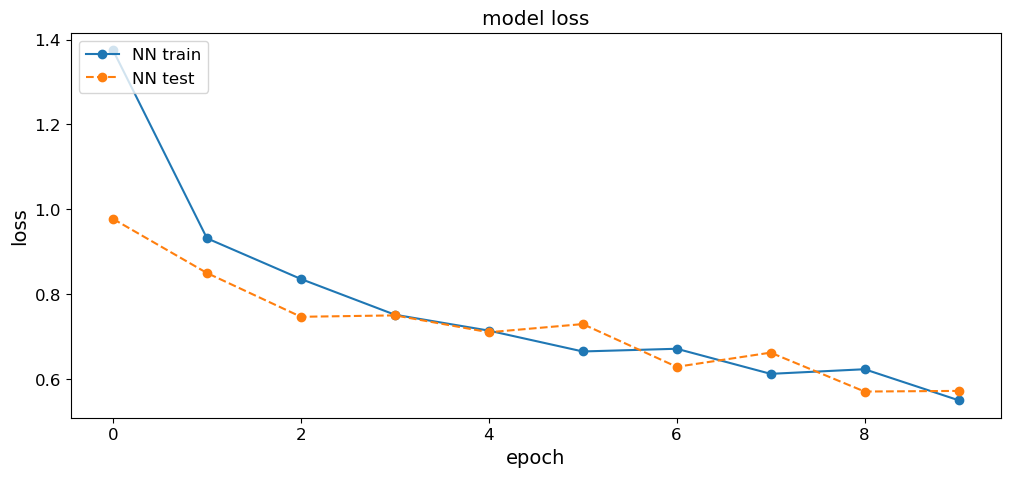

In [12]:
plot_history([(history_baseline,'NN')])

### Dropout

Dropout is a way to regularize the neural network. During training, it may happen that neurons of a particular layer may always become influenced only by the output of a particular neuron in the previous layer. In that case, the neural network would overfit.

Dropout prevents overfitting and regularizes by randomly cutting the connections (also known as dropping the connection) between neurons in successuve layers during training.

In [13]:
## from keras.models import Sequential
from keras.layers import Dense, Dropout


## CREATE A SIMPLE MODEL
batch_size = 128
num_classes = 8
epochs = 10


model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784*channels,)))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

## PRINT SUMMARY
model.summary()

## COMPILE MODEL -> loss + optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## TRAIN THE MODEL
history_dropout = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))


## EVALUATE THE MODEL USING TEST SET
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               602368    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 2056      
Total params: 670,216
Trainable params: 670,216
Non-trainable params: 0
_________________________________________________________________
Train on 11959 samples, validate on 3421 samples
Epoch 1/10
11959/11959 [==============================] - 2s 195u

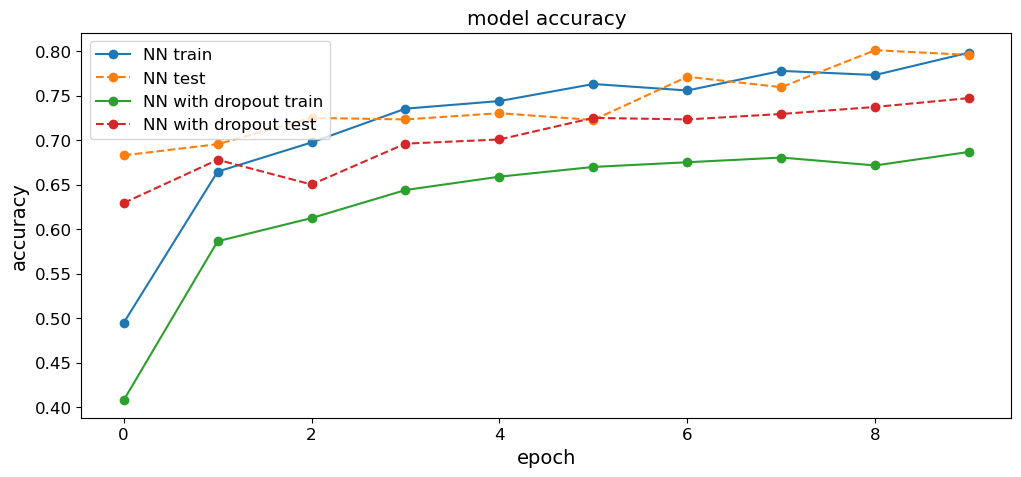

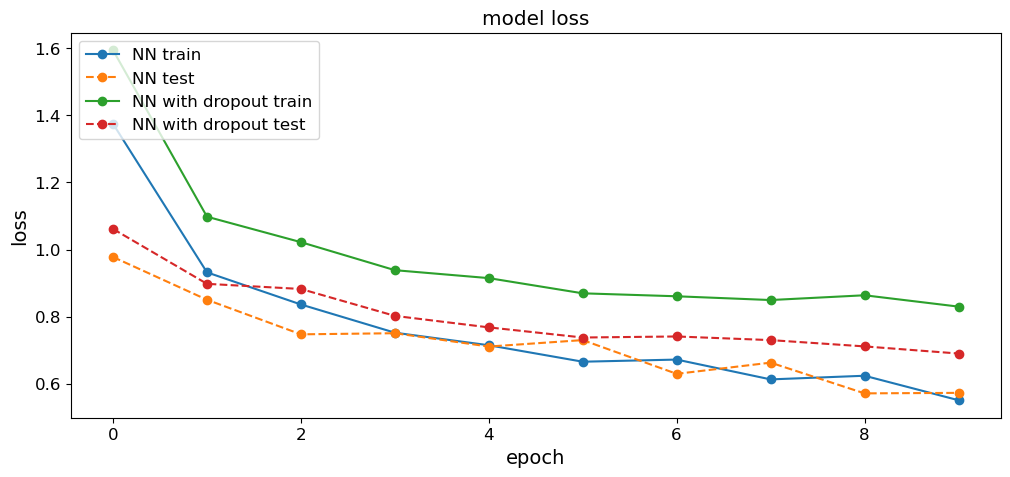

In [14]:
plot_history([(history_baseline,'NN'),(history_dropout,'NN with dropout')])


# Convolutional Neural Networks

## What is a Convolution? 

In [15]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255


images = np.array([china, flower])
#batch_size, height, width, channels = images.shape
#print(batch_size, height, width, channels)

filters:


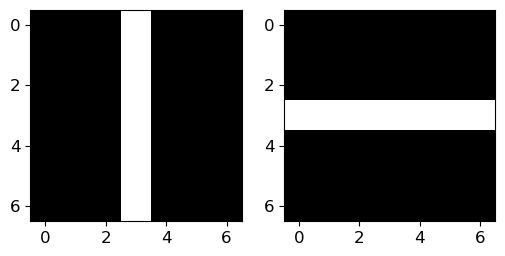

In [16]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

print("filters:")
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(filters[:,:,:,0],cmap="gray")
plt.subplot(122)
plt.imshow(filters[:,:,:,1],cmap="gray")
plt.show()


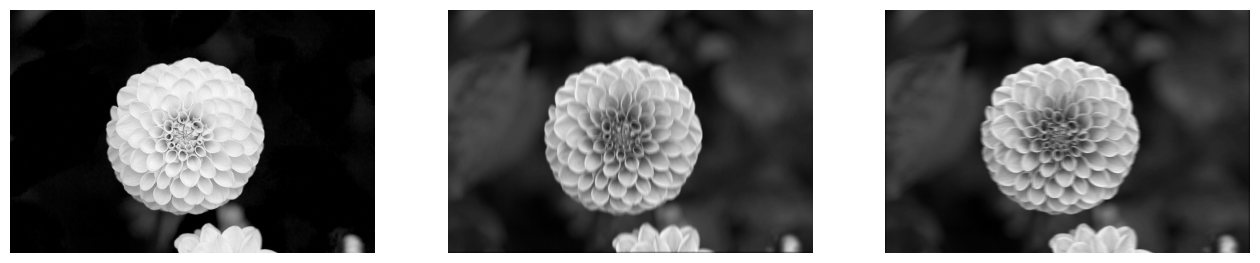

In [17]:
## lets apply these filters to our images

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(images[1, :, :, 0], cmap="gray") # plot 1st image
plt.axis("off") 

plt.subplot(132)
plt.imshow(outputs[1, :, :, 0], cmap="gray") # plot 1st image's 1st feature map
plt.axis("off") 

plt.subplot(133)
plt.imshow(outputs[1, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") 
plt.show()

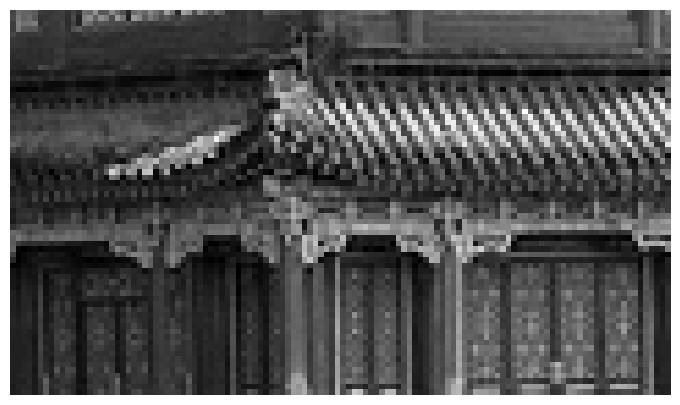

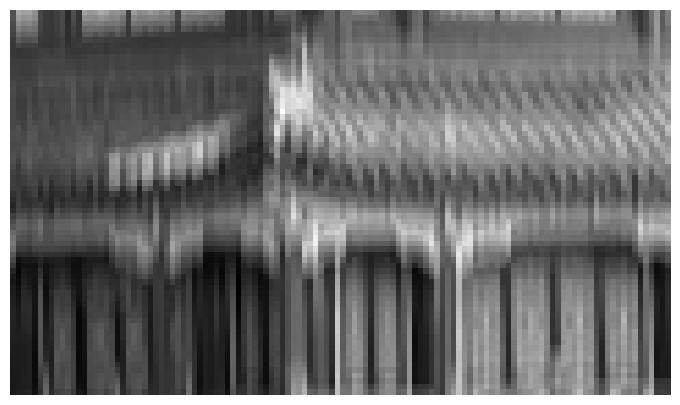

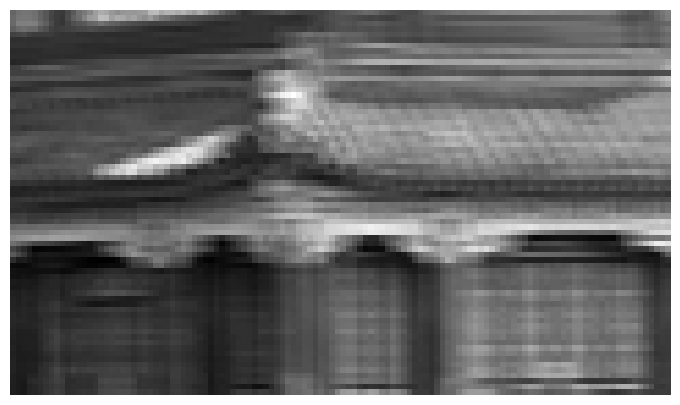

In [18]:
def crop(images):
    return images[150:220, 130:250]
plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

## CNN

The previously mentioned multilayer perceptrons represent the most general and powerful feedforward neural network model possible; they are organised in layers, such that every neuron within a layer receives its own copy of all the outputs of the previous layer as its input. This kind of model is perfect for the right kind of problem – learning from a fixed number of (more or less) unstructured parameters.

> However, consider what happens to the number of parameters (weights) of such a model when being fed raw image data (f.e. a $200 \times 200$ pixel image connected to 1024 neurons).

In [19]:
200 * 200 * 1024

40960000

The situation quickly becomes unmanageable as image sizes grow larger, way before reaching the kind of images people usually want to work with in real applications.

A common solution is to downsample the images to a size where MLPs can safely be applied. However, if we directly downsample the image, we potentially lose a wealth of information; it would be great if we would somehow be able to still do some useful (without causing an explosion in parameter count) processing of the image, prior to performing the downsampling.

It turns out that there is a very efficient way of pulling this off, and it makes advantage of the structure of the information encoded within an image – it is assumed that pixels that are spatially closer together will "cooperate" on forming a particular feature of interest much more than ones on opposite corners of the image. Also, if a particular (smaller) feature is found to be of great importance when defining an image's label, it will be equally important if this feature was found anywhere within the image, regardless of location.

Enter the convolution operator. Given a two-dimensional image, $I$, and a small matrix, $K$ of size $h \times w$, (known as a convolution kernel), which we assume encodes a way of extracting an interesting image feature, we compute the convolved image, $I∗K$, by overlaying the kernel on top of the image in all possible ways, and recording the sum of elementwise products between the image and the kernel:

$$
output(x,y) = (I \otimes K)(x,y) = \sum_{m=0}^{M-1} \sum_{n=1}^{N-1} K(m,n) I(x-n, y-m)
$$

The convolution operator forms the fundamental basis of the convolutional layer of a CNN. The layer is completely specified by a certain number of kernels, $K$, and it operates by computing the convolution of the output images of a previous layer with each of those kernels, afterwards adding the biases (one per each output image). Finally, an activation function, $\sigma$, may be applied to all of the pixels of the output images. 

Typically, the input to a convolutional layer will have $d$ channels (e.g., red/green/blue in the input layer), in which case the kernels are extended to have this number of channels as well.

Note that, since all we're doing here is addition and scaling of the input pixels, the kernels may be learned from a given training dataset via gradient descent, exactly as the weights of an MLP. In fact, an MLP is perfectly capable of replicating a convolutional layer, but it would require a lot more training time (and data) to learn to approximate that mode of operation.

## Pooling

In fact, after a convolutional layer there are two kinds of non linear functions that are usually applied: non-linear activation functions such as sigmoids or ReLU and *pooling*. Pooling layers are used with the purpose to progressively reduce the spatial size of the image to achieve scale invariance. The most common layer is the *maxpool* layer. Basically a maxpool of $2 \times 2$ causes a filter of 2 by 2 to traverse over the entire input array and pick the largest element from the window to be included in the next representation map. Pooling can also be implemented by using other criteria, such as averaging instead of taking the max element. 

In [20]:
## the imports
from tensorflow.keras.models import Sequential
#from keras.layers import Conv2D
from tensorflow.keras.layers import Conv2D,Input, MaxPooling2D, Dense, Dropout, Activation, Flatten

In [21]:
## CREATE A MODEL TO CLASSIFY THE 8 CLASSES

## DEFINE PARAMETERS
kernel_size = (3,3)
batch_size = 128
pool_size = 2 # we will use 2x2 pooling throughout

## CREATE THE MODEL: 
model = Sequential()
model.add(Conv2D(32,kernel_size,activation = 'relu',input_shape = (height,width,channels)))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Flatten())
model.add(Dense(8,activation='softmax'))

## PRINT SUMMARY
model.summary()

## COMPILE MODEL -> loss + optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

X_train = X_train.reshape(num_train,height,width,channels)
X_test = X_test.reshape(num_test,height,width,channels)


## TRAIN THE MODEL
history_cnn = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))

## EVALUATE THE MODEL USING TEST SET
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 43272     
Total params: 44,168
Trainable params: 44,168
Non-trainable params: 0
_________________________________________________________________
Train on 11959 samples, validate on 3421 samples
Epoch 1/10
11959/11959 [==============================] - 13s 1ms/sample - loss: 1.3733 - accuracy: 0.5258 - val_loss: 0.9706 - val_accuracy: 0.6770
Epoch 2/10
11959/11959 [============================

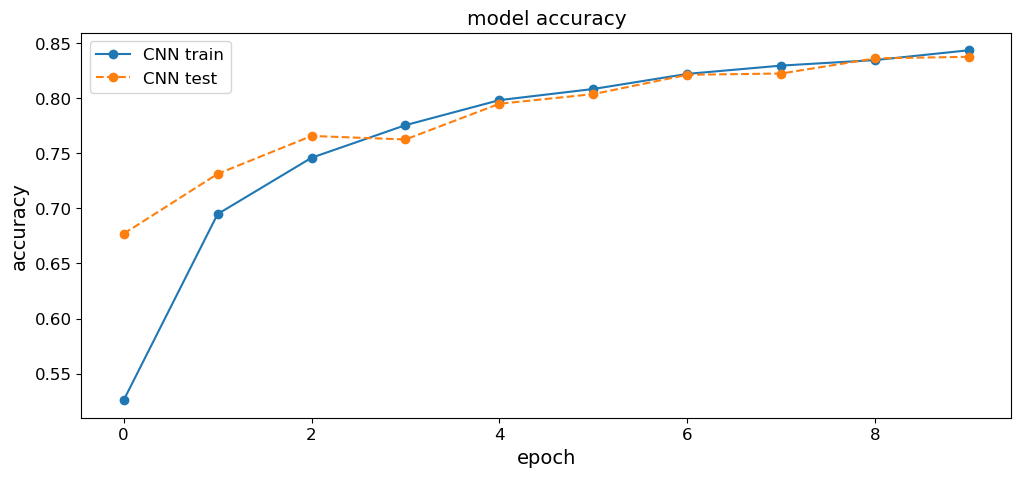

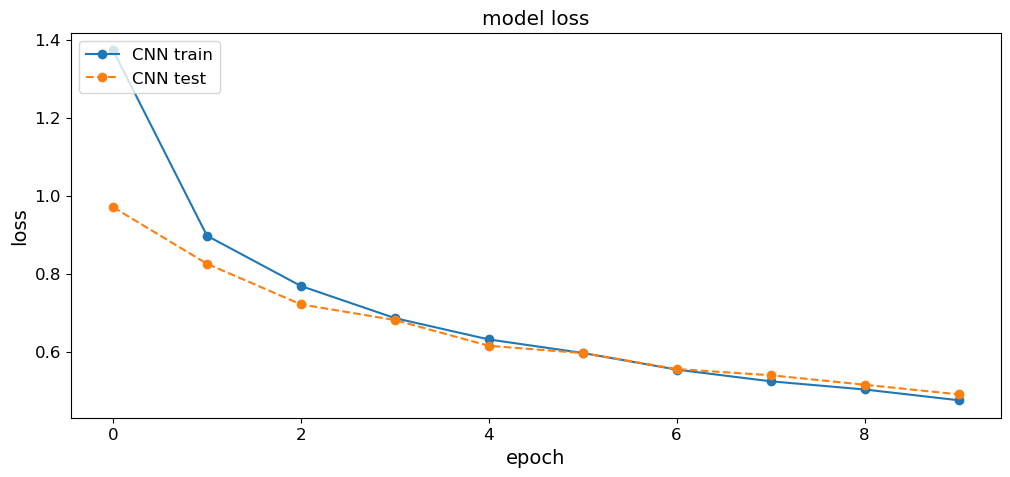

In [22]:
#let's plot some intersting information: the learning curves
plot_history([(history_cnn,'CNN')])

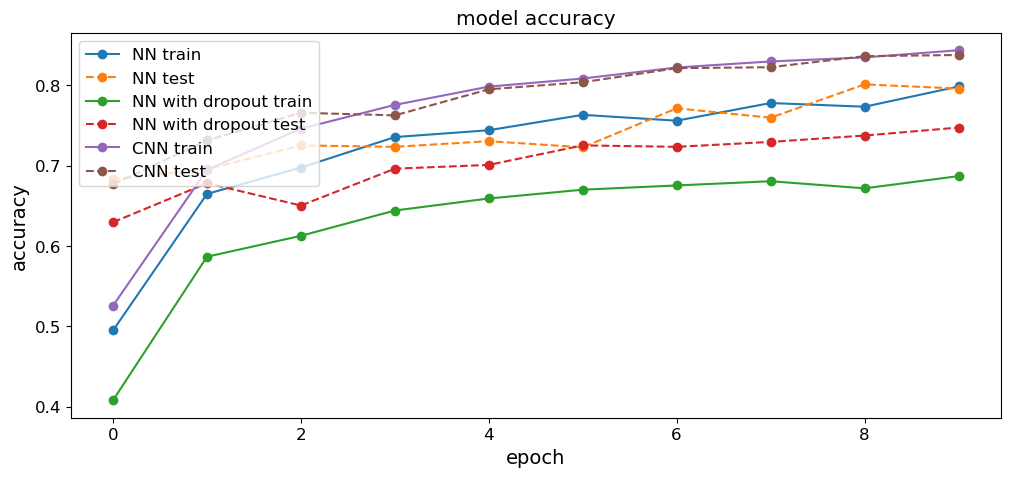

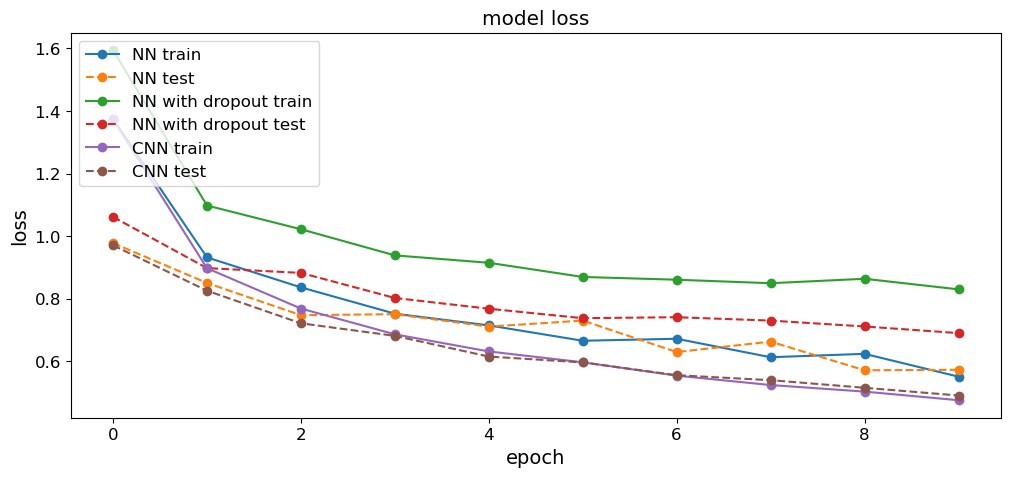

In [23]:
plot_history([(history_baseline,'NN'),(history_dropout,'NN with dropout'),(history_cnn,'CNN')])

In [24]:
# Exercice: Can you improve it??
# your code here:
# train and evaluate your model




In [25]:
predictions = model.predict(X_test)

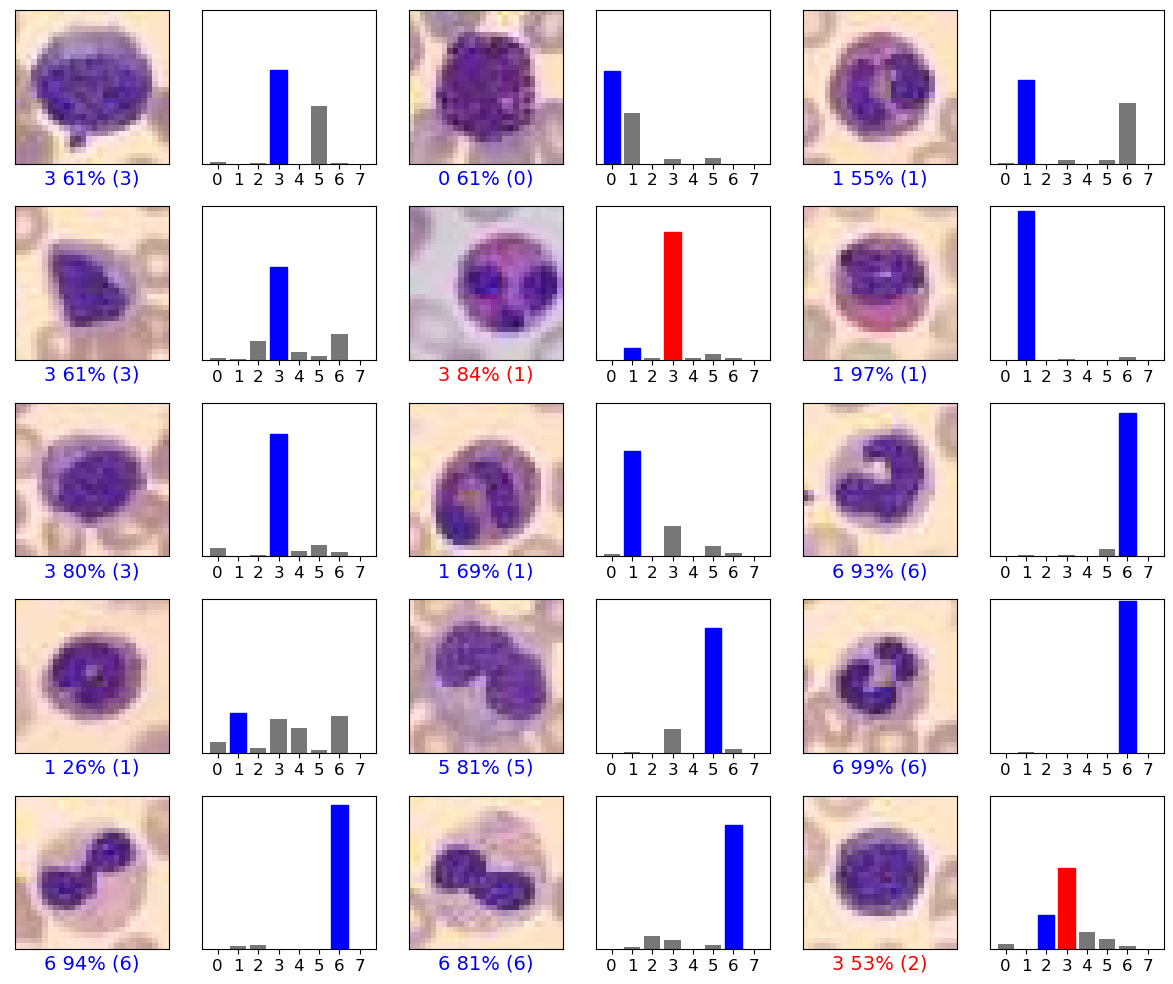

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    true_label = true_label.argmax()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28,28,channels)), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                            100*np.max(predictions_array),
                            class_names[true_label]),
                            color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    true_label = true_label.argmax()
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(8), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')




num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], Y_test)
plt.tight_layout()
plt.show()

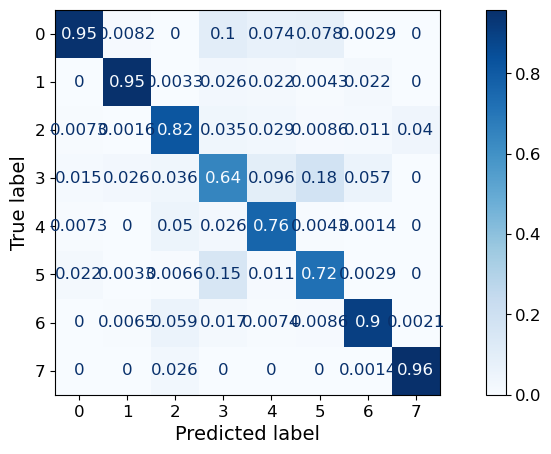

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Predict
y_prediction = model.predict(X_test)
y_prediction=np.argmax(y_prediction, axis=1)

#Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(y_test, y_prediction , normalize='pred')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()